<a href="https://colab.research.google.com/github/sundar911/portfolio_optimisation/blob/main/allocation_and_Sharpe_ratio_basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import quandl

In [ ]:
start = pd.to_datetime('2012-01-01')

In [ ]:
end = pd.to_datetime('2017-01-01')

In [ ]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)

In [ ]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [ ]:
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [ ]:
cisco

,Adj. Close
Date,
2012-01-03,15.617341
2012-01-04,15.919125
2012-01-05,15.860445
2012-01-06,15.801764
2012-01-09,15.902359
...,...
2016-12-23,29.475311
2016-12-27,29.620129
2016-12-28,29.369111


In [ ]:
ibm

,Adj. Close
Date,
2012-01-03,157.578371
2012-01-04,156.935540
2012-01-05,156.191208
2012-01-06,154.398046
2012-01-09,153.594506
...,...
2016-12-23,160.477796
2016-12-27,160.891721
2016-12-28,159.977235


In [ ]:
amzn

,Adj. Close
Date,
2012-01-03,179.03
2012-01-04,177.51
2012-01-05,177.61
2012-01-06,182.61
2012-01-09,178.56
...,...
2016-12-23,760.59
2016-12-27,771.40
2016-12-28,772.13


In [ ]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['Cumulative return'] = stock_df['Adj. Close']/stock_df.iloc[0]['Adj. Close']

In [ ]:
aapl

,Adj. Close,Normed return,Cumulative return
Date,,,
2012-01-03,52.848787,1.000000,1.000000
2012-01-04,53.132802,1.005374,1.005374
2012-01-05,53.722681,1.016536,1.016536
2012-01-06,54.284287,1.027162,1.027162
2012-01-09,54.198183,1.025533,1.025533
...,...,...,...
2016-12-23,115.080808,2.177549,2.177549
2016-12-27,115.811668,2.191378,2.191378
2016-12-28,115.317843,2.182034,2.182034


In [ ]:
for stock_df, alloc in zip([aapl,cisco,ibm,amzn],[.3,.2,.4,.1]): #allocating money
    stock_df['Allocation'] = stock_df['Cumulative return']*alloc

In [ ]:
aapl

,Adj. Close,Normed return,Cumulative return,Aloocation,Allocation
Date,,,,,
2012-01-03,52.848787,1.000000,1.000000,0.300000,0.300000
2012-01-04,53.132802,1.005374,1.005374,0.301612,0.301612
2012-01-05,53.722681,1.016536,1.016536,0.304961,0.304961
2012-01-06,54.284287,1.027162,1.027162,0.308149,0.308149
2012-01-09,54.198183,1.025533,1.025533,0.307660,0.307660
...,...,...,...,...,...
2016-12-23,115.080808,2.177549,2.177549,0.653265,0.653265
2016-12-27,115.811668,2.191378,2.191378,0.657413,0.657413
2016-12-28,115.317843,2.182034,2.182034,0.654610,0.654610


In [ ]:
for stock_df in (aapl,cisco,ibm,amzn):
    stock_df['position values'] = stock_df['Allocation']*1000000

In [ ]:
aapl

,Adj. Close,Normed return,Cumulative return,Aloocation,Allocation,position values
Date,,,,,,
2012-01-03,52.848787,1.000000,1.000000,0.300000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,1.005374,0.301612,0.301612,301612.236461
2012-01-05,53.722681,1.016536,1.016536,0.304961,0.304961,304960.727573
2012-01-06,54.284287,1.027162,1.027162,0.308149,0.308149,308148.724558
2012-01-09,54.198183,1.025533,1.025533,0.307660,0.307660,307659.946988
...,...,...,...,...,...,...
2016-12-23,115.080808,2.177549,2.177549,0.653265,0.653265,653264.617079
2016-12-27,115.811668,2.191378,2.191378,0.657413,0.657413,657413.396830
2016-12-28,115.317843,2.182034,2.182034,0.654610,0.654610,654610.167268


In [ ]:
all_pos_vals = [aapl['position values'],cisco['position values'],ibm['position values'],amzn['position values']]
portfolio_val = pd.concat(all_pos_vals,axis=1)

In [ ]:
portfolio_val

,position values,position values,position values,position values
Date,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166
...,...,...,...,...
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454


In [ ]:
portfolio_val.columns = ['aapl pos','cisco pos','ibm pos','amzn pos']

In [ ]:
portfolio_val['total pos'] = portfolio_val.sum(axis=1)

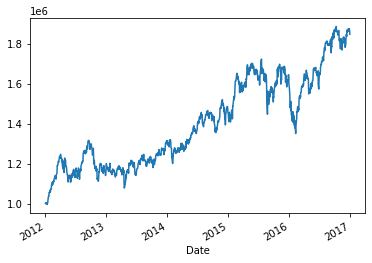

In [ ]:
import matplotlib.pyplot
%matplotlib inline
portfolio_val['total pos'].plot()

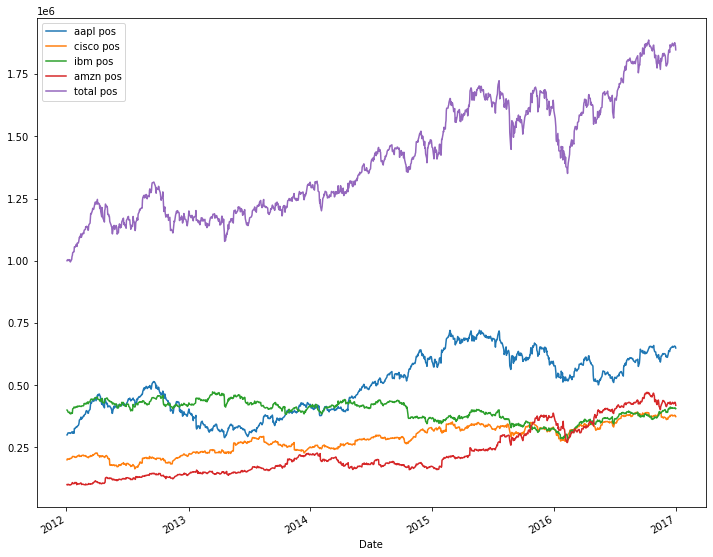

In [ ]:
portfolio_val.plot(figsize=(12,10))

In [ ]:
portfolio_val['daily returns'] = portfolio_val['total pos'].pct_change(1)

In [ ]:
portfolio_val

,aapl pos,cisco pos,ibm pos,amzn pos,total pos,daily returns
Date,,,,,,
2012-01-03,300000.000000,200000.000000,400000.000000,100000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,398368.223296,99150.980283,1.002996e+06,0.002996
2012-01-05,304960.727573,203113.258186,396478.797638,99206.836843,1.003760e+06,0.000761
2012-01-06,308148.724558,202361.782072,391926.999463,101999.664861,1.004437e+06,0.000675
2012-01-09,307659.946988,203650.026838,389887.278583,99737.474166,1.000935e+06,-0.003487
...,...,...,...,...,...,...
2016-12-23,653264.617079,377469.015679,407359.955612,424839.412389,1.862933e+06,-0.001025
2016-12-27,657413.396830,379323.596496,408410.671112,430877.506563,1.876025e+06,0.007028
2016-12-28,654610.167268,376108.989746,406089.322915,431285.259454,1.868094e+06,-0.004228


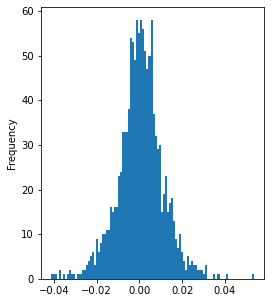

In [ ]:
portfolio_val['daily returns'].plot(kind='hist',bins=100,figsize=(4,5))

In [ ]:
sharpe_ratio = portfolio_val['daily returns'].mean()/portfolio_val['daily returns'].std()

In [ ]:
annualised_sharpe_ratio = sharpe_ratio * (252**0.5)

In [ ]:
annualised_sharpe_ratio

0.817486461885909